In [41]:
import numpy as np
from numpy import dot
from numpy.linalg import norm
import matplotlib.pyplot as plt

In [42]:
# Get labes
labels = np.arange(bucket_start ,bucket_num , 1.0)

In [57]:
# Indicate the directory to get numpy arrays of both mean and var
path = "/Users/testinium/Desktop/final_project/blg_561e_project/agedb-dir/statistics_1/"

In [58]:
# Read numpy arrays , do the cosine similarity operation , store them and show them.

modes = ['var', 'mean']

def show_cosine_similarity(anchor, labels, mode = None):
    if mode == 'None':
        raise ValueError('You must select "var" or "mean" ')
    elif mode in modes:
        cosine_sims = np.array([])
        anchor_list = np.load(f"{path}{anchor}_{mode}.npy")
        print(f"Loading Anchor ... ===> {anchor}_{mode}.npy")
        for label in labels:
            #print(f"Loading Target ... ===> {label}_{mode}.npy")
            target_list = np.load(f"{path}{label}_{mode}.npy")
            temp = cosine_similarity(anchor_list, target_list)
            cosine_sims = np.append(cosine_sims,temp)
        cosine_sim_graph(labels, cosine_sims, anchor, mode)
    else:
        raise ValueError(f" Invalid mode {mode}")
        
            
def cosine_similarity(list_1, list_2):
    epsilon = 1e-6
    return dot(list_1, list_2)/(norm(list_1)*norm(list_2) + epsilon)

def cosine_sim_graph(labels, cos_sims, anchor, mode):
    plt.style.use('ggplot')
    fig=plt.figure(figsize=(12,5))
    bars = plt.bar(labels,cos_sims,color='blue')
    index = list(labels).index(anchor)
    bars[index].set_color('r')
    plt.title(mode.upper())

In [59]:
# Do not change these unless you change in the original repo while training
bucket_num=100
bucket_start=3
# Select an age between "bucket_start" and "bucket_num"
anchor = 10.0

Loading Anchor ... ===> 10.0_mean.npy


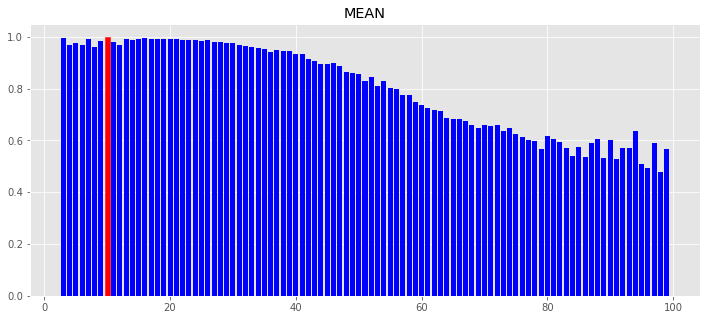

In [60]:
# Cosine similarity for mean
show_cosine_similarity(anchor, labels, "mean")

Loading Anchor ... ===> 10.0_var.npy


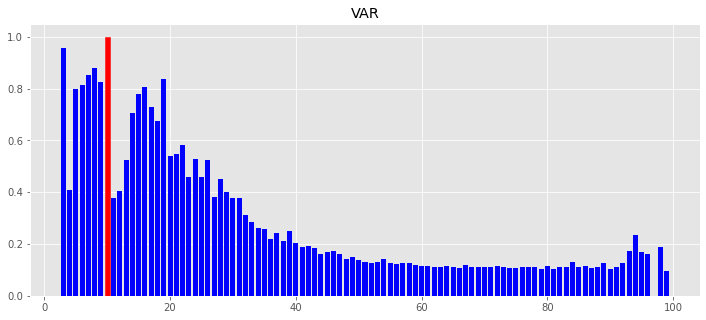

In [61]:
# Cosine similarity for var
show_cosine_similarity(anchor, labels, "var")